c:\Users\USER2\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


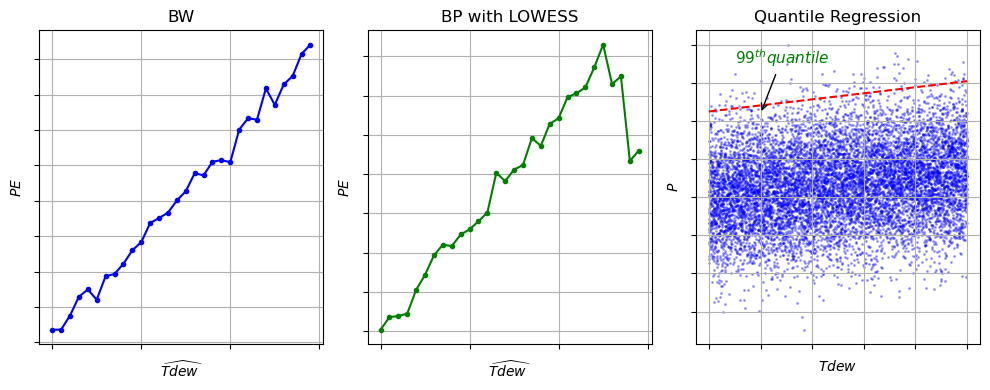

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Generate data for the first figure (slope 0.07 for all points with variation)
np.random.seed(0)
x1 = np.arange(30)
y1 = 0.07 * x1 + np.random.normal(loc=0, scale=0.05, size=30)

# Generate data for the second figure (hook-shaped pattern with variation)
y2 = np.zeros(30)
y2[:25] = 0.07 * x1[:25] + np.random.normal(loc=0, scale=0.05, size=25)
y2[25:] = (0.07 * 24 - 0.07 * (x1[25:] - 24)) + np.random.normal(loc=0, scale=0.5, size=5)

# Fit quantile regression for extreme percentiles for the third figure
x = np.linspace(0, 10, 10000)
y = 0.07 * x + np.random.normal(size=x.size)
quant_formula = 'y ~ x'
quant_mod = sm.QuantReg.from_formula(quant_formula, {'x': x, 'y': y})
quant_reg = quant_mod.fit(q=0.99)  # Quantile regression for 95th percentile

# Create a figure with 1 row and 3 columns
plt.figure(figsize=(10, 4))

### Plot 1: First Figure ###
plt.subplot(1, 3, 1)
plt.plot(x1, y1, marker='o', linestyle='-', color='b', markersize = 3)
plt.title('BW')
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.xlabel('$\widehat{Tdew}$')
plt.ylabel('$PE$')
plt.grid(True)

### Plot 2: Second Figure ###
plt.subplot(1, 3, 2)
plt.plot(x1, y2, marker='o', linestyle='-', color='g', markersize = 3)
plt.title('BP with LOWESS')
plt.xlabel('$\widehat{Tdew}$')
plt.ylabel('$PE$')
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.grid(True)

### Plot 3: Third Figure (Quantile Regression) ###
plt.subplot(1, 3, 3)
plt.scatter(x, y, marker='.', color='b', alpha=0.3, s = 5)
plt.plot(x, quant_reg.predict({'x': x}), color='r', linestyle='--')
plt.title('Quantile Regression')
plt.xlabel('$Tdew$')
plt.ylabel('$P$')
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.grid(True)
plt.annotate('$99^{th} quantile$', xy=(2, 2.2), xytext=(1 , 3.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=11, color='green')
#plt.savefig('D:\Min\Research 1\\methodology.png', dpi=300, transparent=True)

plt.tight_layout()
plt.show()
